In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Read table
bms = pd.read_csv("C:\\Users\\dell\\Desktop\\datasets\\bigmartsales.csv")

In [4]:
# Display some rows of table 
bms.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
bms.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
# Objective - Predict item_outlet_sales based on input parameters
# Output column has continuous numeric data hence it is a regression problem

In [7]:
bms.shape

(8523, 12)

In [8]:
bms.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# No practical sense of Item_Visibility being 0 as minimum

In [10]:
# There are 12 columns in total
# 11 are input variables
# 1 is output or target variable - Item_Outlet_Sales

In [11]:
bms.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Imputation
# Continuous numeric - mean value of column
# Object - mode of the column

In [13]:
mean = bms.Item_Weight.mean()
mean

12.857645184136183

In [14]:
bms.Item_Weight.fillna(value = mean, inplace = True)

In [15]:
mode = bms.Outlet_Size.mode()[0]
mode

'Medium'

In [16]:
bms.Outlet_Size.fillna(value = mode, inplace = True)

In [17]:
# # Modifying Item_Visibility
# # Determining average visibility of product
# vis_avg = bms.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier')
# vis_avg
# # vis2=bms.groupby(['Item_Identifier']).mean()['Item_Visibility']
# # vis2
# miss_bool = (bms.Item_Visibility == 0)
# bms.loc[miss_bool,'Item_Visibility'] = bms.loc[miss_bool,'Item_Identifier'].apply(lambda x: vis_avg[x])

In [18]:
# Number of unique values in each column
bms.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [19]:
# Filter categorical variables
categorical_columns = [x for x in bms.dtypes.index if bms.dtypes[x] == 'object' ]
# exclude item_identifier
categorical_columns = [x for x in categorical_columns if x != 'Item_Identifier']
# Print
for col in categorical_columns:
    print('\nFrequency of categories for variable %s '%col)
    print (bms[col].value_counts())


Frequency of categories for variable Item_Fat_Content 
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Frequency of categories for variable Item_Type 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Frequency of categories for variable Outlet_Identifier 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Frequency of categories for vari

In [20]:
# Replacing mis-coded values in Item_Fat_Content column 
bms.Item_Fat_Content.replace(to_replace = ["LF","low fat","reg"], value = ["Low Fat", "Low Fat", "Regular"], inplace = True )

In [21]:
# Years of operation
bms['Outlet_Years'] = 2013 - bms['Outlet_Establishment_Year']

In [22]:
# If there is a unique column drop it

In [23]:
bms['Item_Identifier']= bms['Item_Identifier'].apply(lambda x : x[0:2])
bms.loc[bms['Item_Identifier']=="NC",'Item_Fat_Content'] = "Non-Edible"

In [24]:
bms.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914,15.168133
std,4.226124,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,9.000000
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

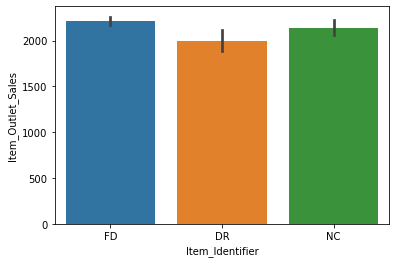

In [25]:
sns.barplot(x = "Item_Identifier", y = "Item_Outlet_Sales", data = bms, orient = 'v')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

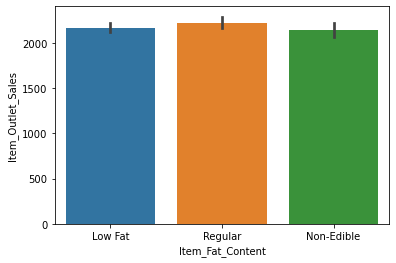

In [26]:
sns.barplot(x = "Item_Fat_Content", y = "Item_Outlet_Sales", data = bms)

In [27]:
# Convert ordinal variables to numerical data
bms.Outlet_Size.value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [28]:
bms.Outlet_Size.replace(to_replace = ["High", "Medium", "Small"], value = [1, 2, 3], inplace = True)

In [29]:
bms=pd.get_dummies(bms, drop_first = True) # This will convert all text columns(nominal) to numeric data 

In [30]:
bms.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Outlet_Size                          int64
Item_Outlet_Sales                  float64
Outlet_Years                         int64
Item_Identifier_FD                   uint8
Item_Identifier_NC                   uint8
Item_Fat_Content_Non-Edible          uint8
Item_Fat_Content_Regular             uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_S

In [31]:
# separating input and output variables
x = bms.drop("Item_Outlet_Sales", axis = 1)
y = bms[["Item_Outlet_Sales"]]


In [32]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
# Using KNN 
# This algorithm requires scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scalar = MinMaxScaler()

In [36]:
x_train_s = scalar.fit_transform(x_train)
x_test_s = scalar.transform(x_test)

In [37]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
# experiment with n_neighbors
model = KNeighborsRegressor(n_neighbors=7)

In [39]:
model.fit(x_train_s,y_train)

KNeighborsRegressor(n_neighbors=7)

In [40]:
y_pred_KNN = model.predict(x_test_s)

In [41]:
# Error in prediction
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mean_absolute_error(y_test,y_pred_KNN)

847.2497181064097

In [43]:
mean_squared_error(y_test,y_pred_KNN)

1374108.6042726545

In [44]:
rmse = (mean_squared_error(y_test,y_pred_KNN))**0.5
rmse

1172.2237859183094

In [45]:
# Optimal value of K
# Elbow curve
mses = []
krange = range(1,20,2)
for i in krange:
    m = KNeighborsRegressor(n_neighbors = i)
    m.fit(x_train_s,y_train)
    ypt = m.predict(x_test_s)
    mses.append(mean_squared_error(y_test,ypt))

In [46]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Elbow Curve')

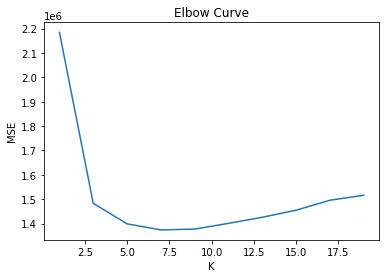

In [47]:
plt.plot(krange,mses)
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("Elbow Curve")

In [48]:
# The optimum value of K is 7